In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Desktop/Cambered_airfoil_data.csv")

In [3]:
data.head()

,Alpha,T1_Re0.050_M0.00_N9.0,,Alpha,T1_Re0.070_M0.00_N9.0,.1,Alpha.1,T1_Re0.090_M0.00_N9.0,.2,Alpha.2,...,Alpha.44,T1_Re0.950_M0.00_N9.0,.45,Alpha.45,T1_Re0.970_M0.00_N9.0,.46,Alpha.46,T1_Re0.990_M0.00_N9.0,.47,.48
0,-6.5,-0.577045,,-7.0,-0.614430,,-7.0,-0.626023,,-7.0,...,-7.0,-0.527666,,-7.0,-0.527016,,-7.0,-0.526441,,
1,-6.0,-0.552619,,-6.5,-0.593440,,-6.5,-0.601547,,-6.5,...,-6.5,-0.466400,,-6.5,-0.465942,,-6.5,-0.465745,,
2,-5.5,-0.522672,,-6.0,-0.561319,,-6.0,-0.566470,,-6.0,...,-6.0,-0.412375,,-6.0,-0.412611,,-6.0,-0.412821,,
3,-5.0,-0.486244,,-5.5,-0.526076,,-5.5,-0.526676,,-5.5,...,-5.5,-0.357905,,-5.5,-0.358466,,-5.5,-0.358982,,
4,-4.5,-0.445651,,-5.0,-0.484870,,-5.0,-0.484836,,-5.0,...,-5.0,-0.304218,,-5.0,-0.304613,,-5.0,-0.305041,,


In [4]:
data.tail()

,Alpha,T1_Re0.050_M0.00_N9.0,,Alpha,T1_Re0.070_M0.00_N9.0,.1,Alpha.1,T1_Re0.090_M0.00_N9.0,.2,Alpha.2,...,Alpha.44,T1_Re0.950_M0.00_N9.0,.45,Alpha.45,T1_Re0.970_M0.00_N9.0,.46,Alpha.46,T1_Re0.990_M0.00_N9.0,.47,.48
48,17.5,0.833164,,17.5,0.878440,,17.0,0.864709,,18.0,...,17.5,1.415771,,17.0,1.441254,,17.0,1.450787,,
49,18.0,0.861466,,18.0,0.851977,,17.5,0.843383,,18.5,...,18.0,1.397626,,17.5,1.425930,,17.5,1.436161,,
50,18.5,0.861321,,18.5,0.870471,,18.0,0.864485,,19.0,...,18.5,1.376234,,18.0,1.408464,,18.0,1.418139,,
51,19.0,0.906854,,19.0,0.902335,,18.5,0.893758,,19.5,...,19.0,1.351526,,18.5,1.385856,,18.5,1.395484,,
52,19.5,0.889752,,19.5,0.892360,,19.0,0.880874,,20.0,...,19.5,1.324569,,19.0,1.361998,,19.0,1.371079,,


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Columns: 145 entries, Alpha to  .48
dtypes: float64(96), object(49)
memory usage: 60.2+ KB


In [6]:
data_empty = pd.DataFrame(np.zeros((2840,3), dtype=None))

In [7]:
data_empty.rename(columns = {0:'Reynolds No',1:'Angle of Attack',2:'Cl'}, inplace = True)

In [8]:
data_empty.head()

,Reynolds No,Angle of Attack,Cl
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [9]:
print(data.iloc[36,3])

11.0


In [9]:
r=50000
c=0
k=0
while r<=400000:
    for i in range(0,40):
        val1 = data.iloc[i,c]
        val2 = data.iloc[i,c+1]
        data_empty.iloc[k,1] = val1
        data_empty.iloc[k,2] = val2
        data_empty.iloc[k,0] = r
        k=k+1
    r=r+20000
    c=c+3
        

In [11]:
data_empty.tail()

,Reynolds No,Angle of Attack,Cl
2835,0.0,0.0,0.0
2836,0.0,0.0,0.0
2837,0.0,0.0,0.0
2838,0.0,0.0,0.0
2839,0.0,0.0,0.0


In [12]:
target = data_empty.iloc[:,2]

In [13]:
target.head()

0   -0.766721
1   -0.727267
2   -0.690420
3   -0.653650
4   -0.617909
Name: Cl, dtype: float64

In [14]:
train_set = data_empty.copy(deep=True)

In [15]:
train_set.drop('Cl',axis=1,inplace=True)

In [16]:
train_set.head()

,Reynolds No,Angle of Attack
0,50000.0,-7.0
1,50000.0,-6.5
2,50000.0,-6.0
3,50000.0,-5.5
4,50000.0,-5.0


In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set,target)

LinearRegression()

In [18]:
import matplotlib.pyplot as plt

In [19]:
test_data=pd.read_csv("Desktop/test.csv")

<AxesSubplot:xlabel='Angle of Attack'>

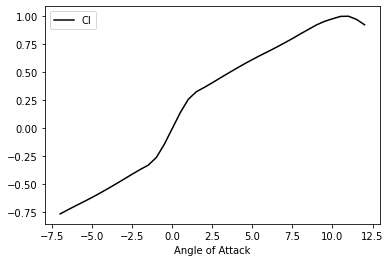

In [20]:
test_data.plot(x='Angle of Attack',y='Cl',color='black')

In [21]:
test_set=test_data.drop('Cl',axis=1)
test_set.head()

,Reynolds No,Angle of Attack
0,124350,-7.0
1,124350,-6.5
2,124350,-6.0
3,124350,-5.5
4,124350,-5.0


In [22]:
pred_Cl = lin_reg.predict(test_set)

In [23]:
df = pd.DataFrame(pred_Cl)

In [24]:
test_set["Cl"] = pred_Cl

In [25]:
test_set.head()

,Reynolds No,Angle of Attack,Cl
0,124350,-7.0,-0.75946
1,124350,-6.5,-0.70814
2,124350,-6.0,-0.65682
3,124350,-5.5,-0.60550
4,124350,-5.0,-0.55418


<AxesSubplot:xlabel='Angle of Attack', ylabel='Cl'>

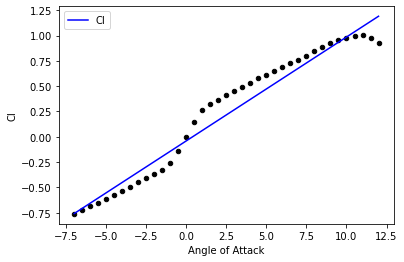

In [26]:
ax = plt.gca()
test_data.plot(x='Angle of Attack',y='Cl',color='black',kind='scatter',ax=ax)
test_set.plot(x='Angle of Attack',y='Cl',color='blue',ax=ax)

In [182]:
Cl_actual=test_data.iloc[:,2:].values

In [184]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Cl_actual, pred_Cl)

0.015010541058708285

# Curve Optimization

The present curves underfit the data and polynomial regression on the whole dataset will not work properly. Looking at the data one of the option is to split the data into four sections based on Angle of Attack. The first, second and third section will work well with Linear Regression and the fourth section can be fitted with second order polynomial.

In [152]:
data_1 = pd.DataFrame(np.zeros((760,3),dtype=None))
data_2 = pd.DataFrame(np.zeros((349,3),dtype=None))
data_3 = pd.DataFrame(np.zeros((1059,3),dtype=None))
data_4 = pd.DataFrame(np.zeros((601,3),dtype=None))

In [153]:
data_empty.head()

,Reynolds No,Angle of Attack,Cl
0,50000.0,-7.0,-0.766721
1,50000.0,-6.5,-0.727267
2,50000.0,-6.0,-0.690420
3,50000.0,-5.5,-0.653650
4,50000.0,-5.0,-0.617909


In [154]:
c1=0
c2=0
c3=0
c4=0
for i in range(0,2840):
    if(data_empty.iloc[i,1]>-7 and data_empty.iloc[i,1]<-1):
        var_1 = data_empty.iloc[i,0]
        var_2 = data_empty.iloc[i,1]
        var_3 = data_empty.iloc[i,2]
        data_1.iloc[c1,0] = var_1
        data_1.iloc[c1,1] = var_2
        data_1.iloc[c1,2] = var_3
        c1=c1+1
    if(data_empty.iloc[i,1]>=-1 and data_empty.iloc[i,1]<=1):
        var_1 = data_empty.iloc[i,0]
        var_2 = data_empty.iloc[i,1]
        var_3 = data_empty.iloc[i,2]
        data_2.iloc[c2,0] = var_1
        data_2.iloc[c2,1] = var_2
        data_2.iloc[c2,2] = var_3
        c2=c2+1
    if(data_empty.iloc[i,1]>1 and data_empty.iloc[i,1]<9):
        var_1 = data_empty.iloc[i,0]
        var_2 = data_empty.iloc[i,1]
        var_3 = data_empty.iloc[i,2]
        data_3.iloc[c3,0] = var_1
        data_3.iloc[c3,1] = var_2
        data_3.iloc[c3,2] = var_3
        c3=c3+1
    if(data_empty.iloc[i,1]>=9):
        var_1 = data_empty.iloc[i,0]
        var_2 = data_empty.iloc[i,1]
        var_3 = data_empty.iloc[i,2]
        data_4.iloc[c4,0] = var_1
        data_4.iloc[c4,1] = var_2
        data_4.iloc[c4,2] = var_3
        c4=c4+1
    

In [155]:
data_4.head(605)

,0,1,2
0,50000.0,9.0,0.854508
1,50000.0,9.5,0.829123
2,50000.0,10.0,0.794088
3,50000.0,11.0,0.579317
4,50000.0,11.5,0.647793
...,...,...,...
596,400000.0,10.5,1.064968
597,400000.0,11.0,1.097733
598,400000.0,11.5,1.112638
599,400000.0,12.0,1.135668


In [156]:
train_set_1 = data_1.copy(deep=True)
train_set_2 = data_2.copy(deep=True)
train_set_3 = data_3.copy(deep=True)
train_set_4 = data_4.copy(deep=True)

In [157]:
target_1 = data_1.iloc[:,2]
target_2 = data_2.iloc[:,2]
target_3 = data_3.iloc[:,2]
target_4 = data_4.iloc[:,2]

In [158]:
target_1

0     -0.727267
1     -0.690420
2     -0.653650
3     -0.617909
4     -0.581002
         ...   
755   -0.432562
756   -0.357622
757   -0.280691
758   -0.215691
759   -0.156813
Name: 2, Length: 760, dtype: float64

In [159]:
train_set_1.drop(2,axis=1,inplace=True)
train_set_2.drop(2,axis=1,inplace=True)
train_set_3.drop(2,axis=1,inplace=True)
train_set_4.drop(2,axis=1,inplace=True)

In [160]:
train_set_1

,0,1
0,50000.0,-6.5
1,50000.0,-6.0
2,50000.0,-5.5
3,50000.0,-5.0
4,50000.0,-4.5
...,...,...
755,400000.0,-3.5
756,400000.0,-3.0
757,400000.0,-2.5
758,400000.0,-2.0


Creating Test Set from Test Data

In [167]:
test_set_1=pd.DataFrame(np.zeros((12,2),dtype=None))
test_set_2=pd.DataFrame(np.zeros((5,2),dtype=None))
test_set_3=pd.DataFrame(np.zeros((15,2),dtype=None))
test_set_4=pd.DataFrame(np.zeros((7,2),dtype=None))

In [168]:
c1=0
c2=0
c3=0
c4=0
for i in range(0,39):
    if(test_data.iloc[i,1]>=-7 and test_data.iloc[i,1]<-1):
        var_1 = test_data.iloc[i,0]
        var_2 = test_data.iloc[i,1]
        #var_3 = test_data.iloc[i,2]
        test_set_1.iloc[c1,0] = var_1
        test_set_1.iloc[c1,1] = var_2
       # data_1.iloc[c1,2] = var_3
        c1=c1+1
    if(test_data.iloc[i,1]>=-1 and test_data.iloc[i,1]<=1):
        var_1 = test_data.iloc[i,0]
        var_2 = test_data.iloc[i,1]
        #var_3 = data_empty.iloc[i,2]
        test_set_2.iloc[c2,0] = var_1
        test_set_2.iloc[c2,1] = var_2
        #data_2.iloc[c2,2] = var_3
        c2=c2+1
    if(test_data.iloc[i,1]>1 and test_data.iloc[i,1]<9):
        var_1 = test_data.iloc[i,0]
        var_2 = test_data.iloc[i,1]
        #var_3 = data_empty.iloc[i,2]
        test_set_3.iloc[c3,0] = var_1
        test_set_3.iloc[c3,1] = var_2
        #data_3.iloc[c3,2] = var_3
        c3=c3+1
    if(test_data.iloc[i,1]>=9):
        var_1 = test_data.iloc[i,0]
        var_2 = test_data.iloc[i,1]
        #var_3 = data_empty.iloc[i,2]
        test_set_4.iloc[c4,0] = var_1
        test_set_4.iloc[c4,1] = var_2
        #data_4.iloc[c4,2] = var_3
        c4=c4+1

In [169]:
test_set_4

,0,1
0,124350.0,9.0
1,124350.0,9.5
2,124350.0,10.0
3,124350.0,10.5
4,124350.0,11.0
5,124350.0,11.5
6,124350.0,12.0


# Training of Data

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# The first three data set will be trained with Linear Regression
lin_reg_1 = LinearRegression()
lin_reg_1.fit(train_set_1,target_1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(train_set_2,target_2)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(train_set_3,target_3)

# The fourth data set will be trained with polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
poly_out = poly_reg.fit_transform(train_set_4)
#poly_reg.fit(poly_out,target)
pol_reg = LinearRegression()
pol_reg.fit(poly_out, target_4)

LinearRegression()

In [171]:
pred_Cl_1 = lin_reg_1.predict(test_set_1)
#pred_Cl_2 = lin_reg_2.predict(test_set_2)
pred_Cl_3 = lin_reg_3.predict(test_set_3)

In [172]:
poly_reg_4t = PolynomialFeatures(degree=2)
poly_out_4t = poly_reg.fit_transform(test_set_4)
pred_Cl_4 = pol_reg.predict(poly_out_4t)

In [173]:
df_1=pd.DataFrame(pred_Cl_1)
df_2=pd.DataFrame(pred_Cl_2)
df_3=pd.DataFrame(pred_Cl_3)
df_4=pd.DataFrame(pred_Cl_4)

In [174]:
test_set_1["Cl"] = pred_Cl_1
test_set_2["Cl"] = pred_Cl_2
test_set_3["Cl"] = pred_Cl_3
test_set_4["Cl"] = pred_Cl_4

In [175]:
test_set_1.rename(columns = {0:'Reynolds No',1:'Angle of Attack'}, inplace = True)
test_set_2.rename(columns = {0:'Reynolds No',1:'Angle of Attack'}, inplace = True)
test_set_3.rename(columns = {0:'Reynolds No',1:'Angle of Attack'}, inplace = True)
test_set_4.rename(columns = {0:'Reynolds No',1:'Angle of Attack'}, inplace = True)

In [176]:
test_set_4

,Reynolds No,Angle of Attack,Cl
0,124350.0,9.0,0.930631
1,124350.0,9.5,0.943709
2,124350.0,10.0,0.947690
3,124350.0,10.5,0.942576
4,124350.0,11.0,0.928366
5,124350.0,11.5,0.905061
6,124350.0,12.0,0.872659


In [177]:
result_set = pd.concat([test_set_1, test_set_2, test_set_3, test_set_4], ignore_index=True)

In [178]:
result_set

,Reynolds No,Angle of Attack,Cl
0,124350.0,-7.0,-0.830534
1,124350.0,-6.5,-0.779323
2,124350.0,-6.0,-0.728112
3,124350.0,-5.5,-0.676901
4,124350.0,-5.0,-0.625690
5,124350.0,-4.5,-0.574479
6,124350.0,-4.0,-0.523269
7,124350.0,-3.5,-0.472058
8,124350.0,-3.0,-0.420847
9,124350.0,-2.5,-0.369636


<AxesSubplot:xlabel='Angle of Attack', ylabel='Cl'>

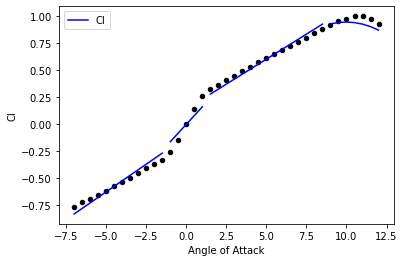

In [179]:
ax = plt.gca()
test_data.plot(x='Angle of Attack',y='Cl',color='black',kind='scatter',ax=ax)
test_set_1.plot(x='Angle of Attack',y='Cl',color='blue',ax=ax)
test_set_2.plot(x='Angle of Attack',y='Cl',color='blue',ax=ax,legend=None)
test_set_3.plot(x='Angle of Attack',y='Cl',color='blue',ax=ax,legend=None)
test_set_4.plot(x='Angle of Attack',y='Cl',color='blue',ax=ax,legend=None)

<AxesSubplot:xlabel='Angle of Attack', ylabel='Cl'>

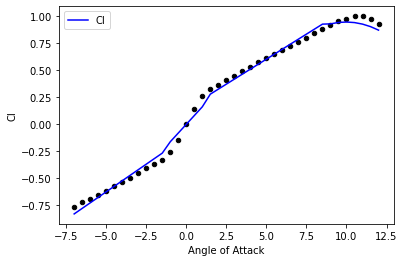

In [180]:
ax = plt.gca()
test_data.plot(x='Angle of Attack',y='Cl',color='black',kind='scatter',ax=ax)
result_set.plot(x='Angle of Attack',y='Cl',color='blue',ax=ax)

In [192]:
pred_overall_Cl = result_set.iloc[:,2:].values
mean_squared_error(Cl_actual, pred_overall_Cl)

0.001961482673956767

In [193]:
from sklearn.metrics import max_error 
max_error(Cl_actual, pred_overall_Cl)

0.09852245265248569

# Optimization Result
The mean Square error reduced to 0.00196 from 0.015. The max error is 0.098